IMPORT THE LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
LOAD THE DATASET

In [ ]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')

In [ ]:
EXPLORE THE DATA

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.size

140000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
df.iloc[:,0:4]

,RowNumber,CustomerId,Surname,CreditScore
0,1,15634602,Hargrave,619
1,2,15647311,Hill,608
2,3,15619304,Onio,502
3,4,15701354,Boni,699
4,5,15737888,Mitchell,850
...,...,...,...,...
9995,9996,15606229,Obijiaku,771
9996,9997,15569892,Johnstone,516
9997,9998,15584532,Liu,709
9998,9999,15682355,Sabbatini,772


In [ ]:
df.iloc[:,4:13]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,42,2,0.00,1,1,1,101348.88
1,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,France,Female,42,8,159660.80,3,1,0,113931.57
3,France,Female,39,1,0.00,2,0,0,93826.63
4,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64
9996,France,Male,35,10,57369.61,1,1,1,101699.77
9997,France,Female,36,7,0.00,1,0,1,42085.58
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
df.loc[:,['CreditScore','Age']]
#

,CreditScore,Age
0,619,42
1,608,41
2,502,42
3,699,39
4,850,43
...,...,...
9995,771,39
9996,516,35
9997,709,36
9998,772,42


DATA VISUALIZATION

<Axes: >

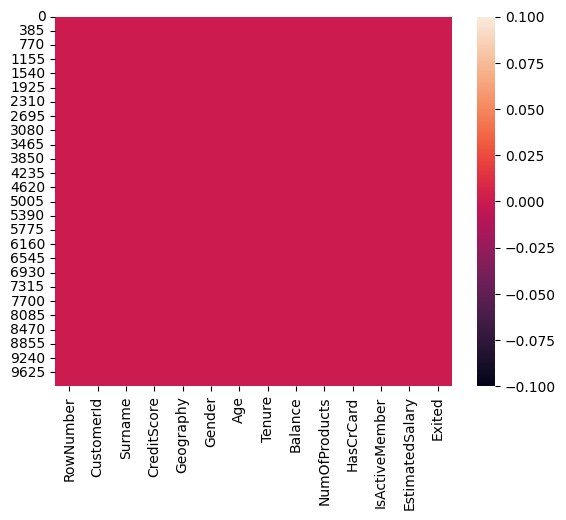

In [ ]:
sns.heatmap(df.isnull())

<Axes: xlabel='Age', ylabel='Density'>

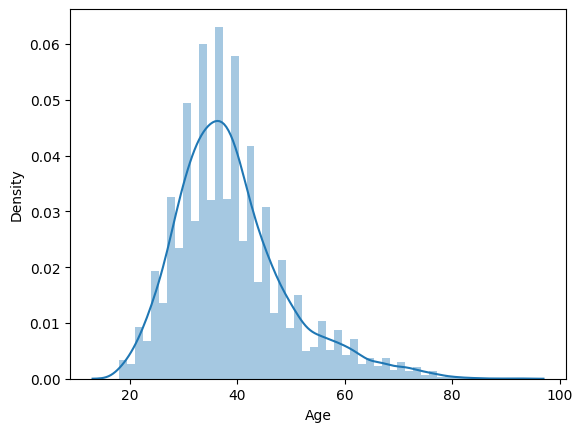

In [ ]:
sns.distplot(df['Age'])

<Axes: xlabel='count', ylabel='Gender'>

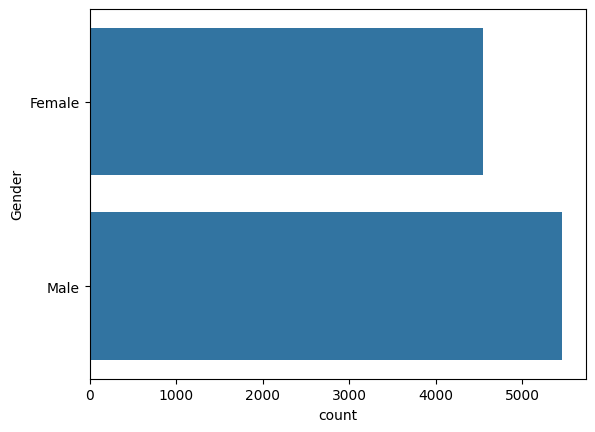

In [ ]:
sns.countplot(df['Gender'])


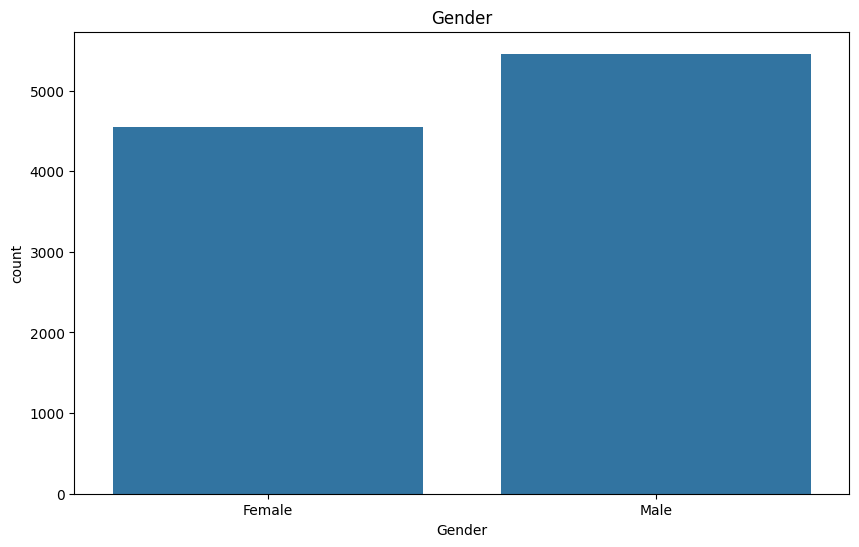

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df)
plt.title('Gender')
plt.show()

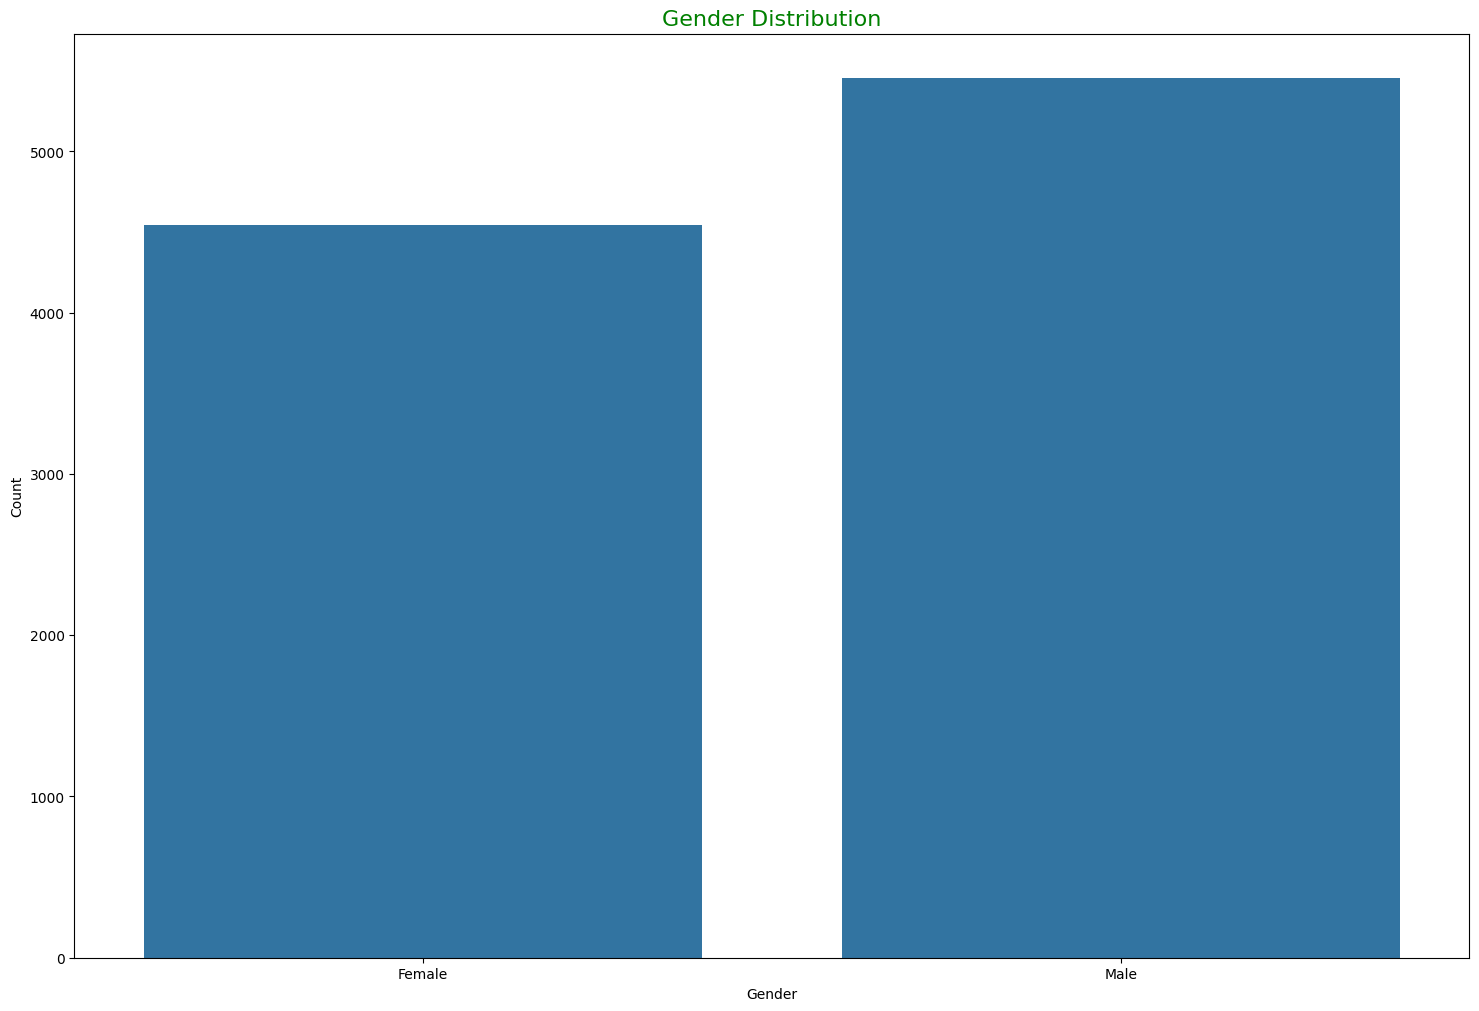

In [ ]:
plt.figure(figsize=(18,12))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution', fontsize = 16, fontweight = 'normal', color = 'green')
plt.show()

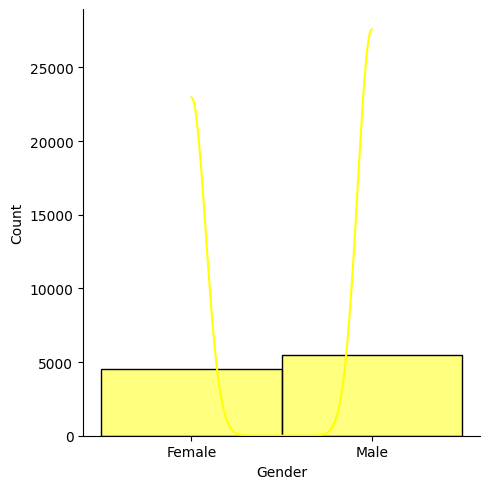

In [ ]:
sns.displot(df.Gender, kde = True, color = 'yellow')

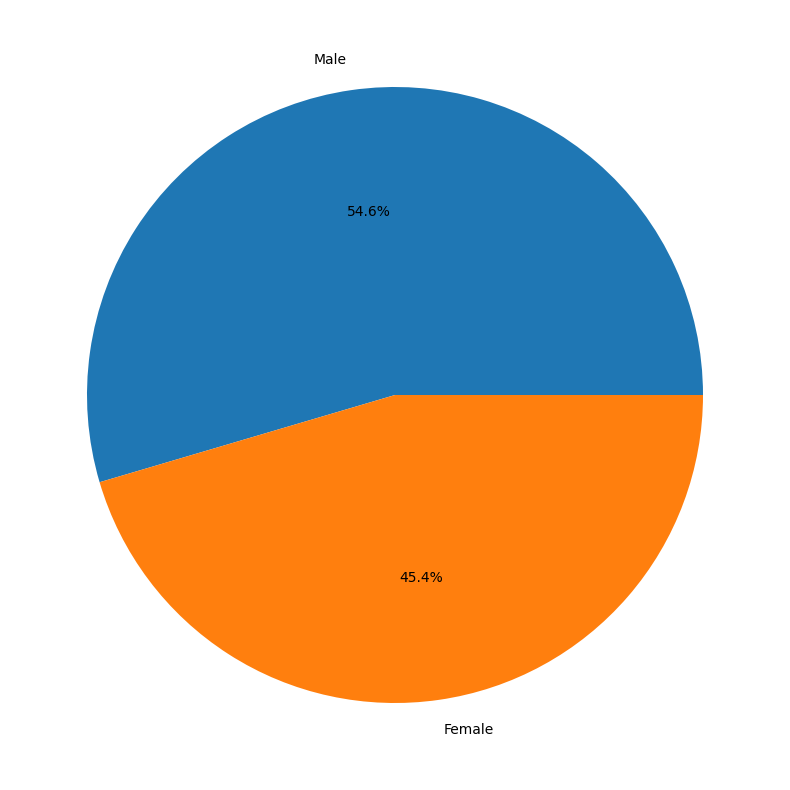

In [ ]:
plt.figure(figsize=(14,10))
count1 = df.Gender.value_counts()
plt.pie(count1, labels = count1.index, autopct = '%1.1f%%')
plt.show()

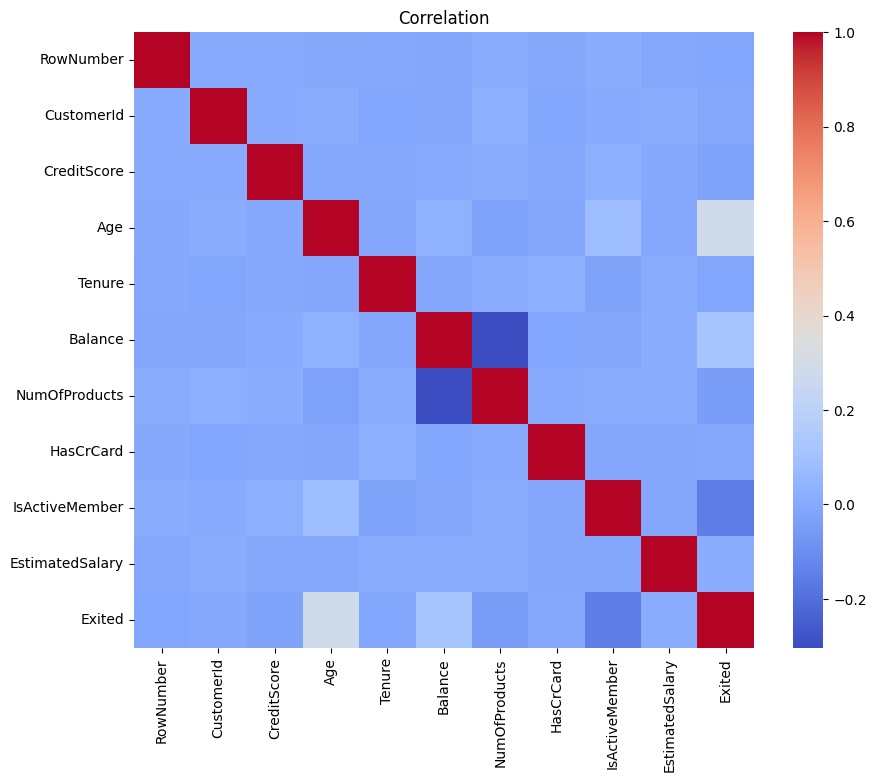

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
correlation = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt='.4f')
plt.title('Correlation')
plt.show()

In [ ]:
PREPROCESS THE DATA

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.drop(['CreditScore','Geography','Age','Tenure'], axis = 1, inplace=True)

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.tail()

,RowNumber,CustomerId,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abbie,Surname_Abbott,...,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Gender_Male
9995,9996,15606229,0.00,2,1,0,96270.64,0,False,False,...,False,False,False,False,False,False,False,False,False,True
9996,9997,15569892,57369.61,1,1,1,101699.77,0,False,False,...,False,False,False,False,False,False,False,False,False,True
9997,9998,15584532,0.00,1,0,1,42085.58,1,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,9999,15682355,75075.31,2,1,0,92888.52,1,False,False,...,False,False,False,False,False,False,False,False,False,True
9999,10000,15628319,130142.79,1,1,0,38190.78,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


NameError: name 'StandardScaler' is not defined

TRAIN LOGISTIC REGRESSION MODEL

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
print('Logistic Regression Model:')
print('Accuracy Score:', accuracy_score(y_test, lr_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))
print('Classification Report:\n', classification_report(y_test, lr_pred))
print('Precision Score:', precision_score(y_test, lr_pred))
print('Recall Score:', recall_score(y_test, lr_pred))
print('F1 Score:', f1_score(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

Logistic Regression Model:
Accuracy Score: 0.8035
Confusion Matrix:
 [[1607    0]
 [ 393    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
R2 Score: -0.2445550715619167


TRAIN RANDOM FOREST MODEL

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
print('Random Forest Model:')
print('Accuracy Score:', accuracy_score(y_test, rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))
print('Classification Report:\n', classification_report(y_test, rf_pred))
print('Precision Score:', precision_score(y_test, rf_pred))
print('Recall Score:', recall_score(y_test, rf_pred))
print('F1 Score:', f1_score(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Random Forest Model:
Accuracy Score: 0.822
Confusion Matrix:
 [[1585   22]
 [ 334   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1607
           1       0.73      0.15      0.25       393

    accuracy                           0.82      2000
   macro avg       0.78      0.57      0.57      2000
weighted avg       0.81      0.82      0.77      2000

Precision Score: 0.7283950617283951
Recall Score: 0.15012722646310434
F1 Score: 0.2489451476793249
R2 Score: -0.12738322004082026


TRAIN GRADIENT BOOSTING CLASSIFIER MODEL

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
print('Gradient Boosting Model:')
print('Accuracy Score:', accuracy_score(y_test, gb.predict(x_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb.predict(x_test)))
print('Classification Report:\n', classification_report(y_test, gb.predict(x_test)))
print('Feature Importance:\n', gb.feature_importances_)
print('precision Score:', precision_score(y_test, gb.predict(x_test)))
print('Recall Score:', recall_score(y_test, gb.predict(x_test)))
print('F1 Score:', f1_score(y_test, gb.predict(x_test)))
print('R2 Score:', r2_score(y_test, gb.predict(x_test)))

Gradient Boosting Model:
Accuracy Score: 0.823
Confusion Matrix:
 [[1588   19]
 [ 335   58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1607
           1       0.75      0.15      0.25       393

    accuracy                           0.82      2000
   macro avg       0.79      0.57      0.57      2000
weighted avg       0.81      0.82      0.77      2000

Feature Importance:
 [0.00466201 0.00781984 0.08535915 ... 0.         0.         0.03724213]
precision Score: 0.7532467532467533
Recall Score: 0.1475826972010178
F1 Score: 0.24680851063829787
R2 Score: -0.12104960644508522
